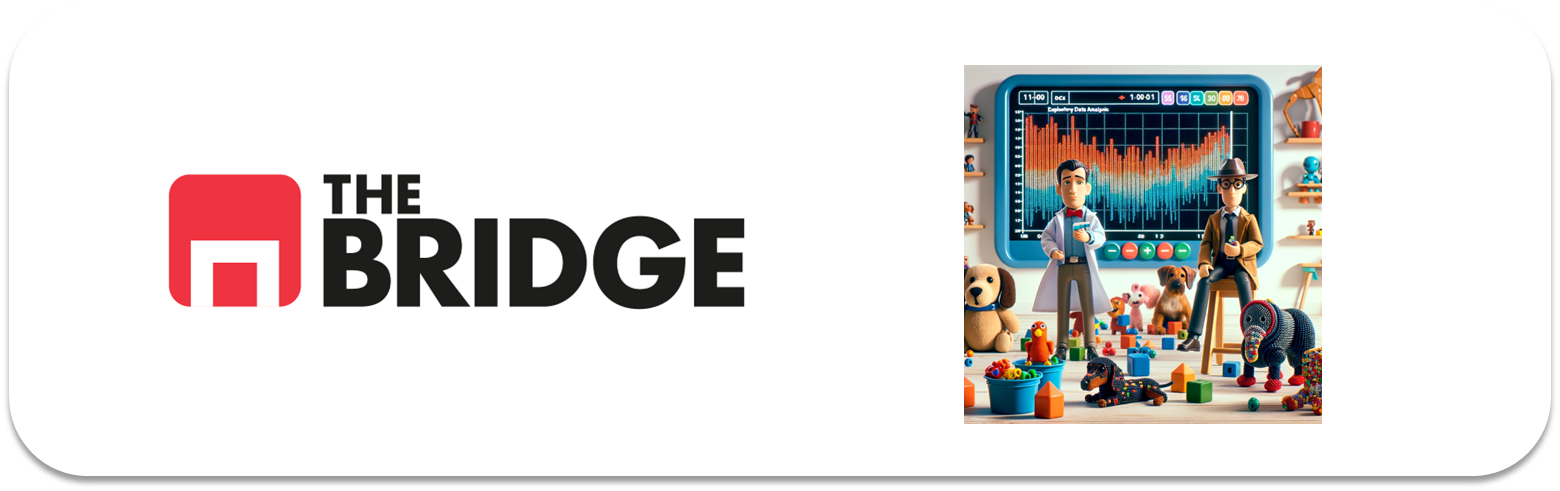

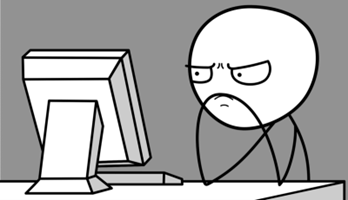

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion


### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [6]:
df_admisiones=pd.read_csv("./data/admission_data.csv")
df_admisiones.drop(columns=["Unnamed: 0","Year"],inplace=True)
# Nos quedamos con el dato de Year que todas las solicitudes se hicieron en 1973
df_admisiones

,Major,Gender,Admission
0,School of Medicine,F,Rejected
1,Department of Economics,M,Accepted
2,Other,F,Accepted
3,Other,M,Accepted
4,Other,M,Rejected
...,...,...,...
12758,Other,M,Accepted
12759,Department of Mechanical Engineering,M,Accepted
12760,Other,F,Rejected
12761,Other,M,Rejected


### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

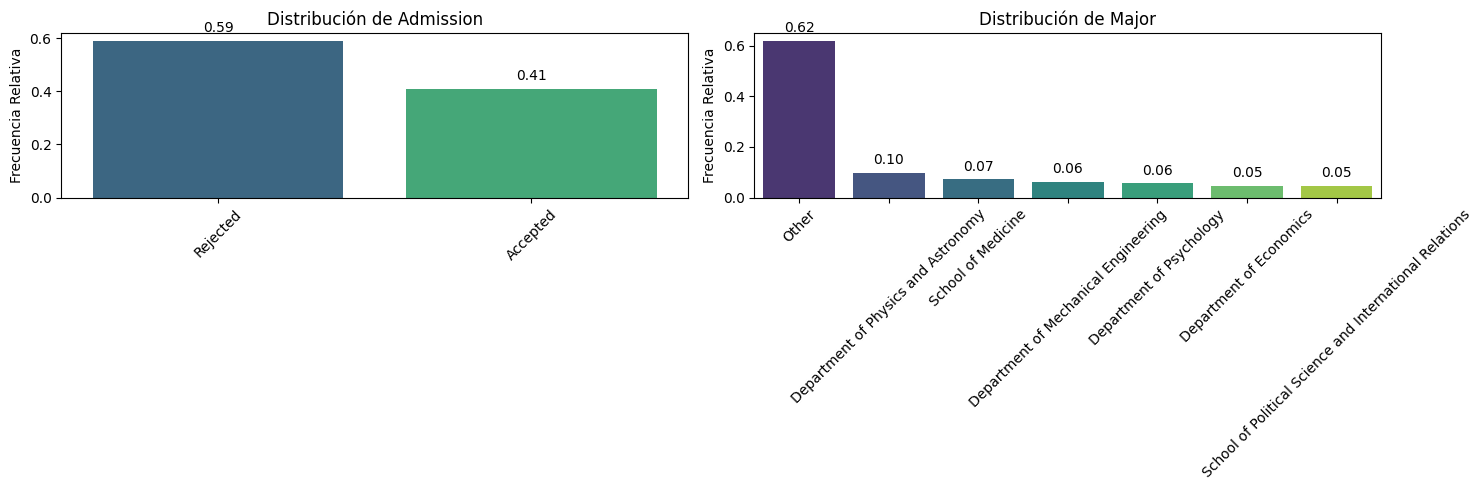

In [7]:
# Pintamos sus distribuciones relativas para tener un primer vistazo de la informacion
pinta_distribucion_categoricas(df_admisiones,["Admission","Major"], relativa=True, mostrar_valores=True)

De primeras tenemos un dominante caso de rechazos frente a acceptaciones y que las áreas de más afluencia está en otros.
El resto de departamentos estan bastante parejos.

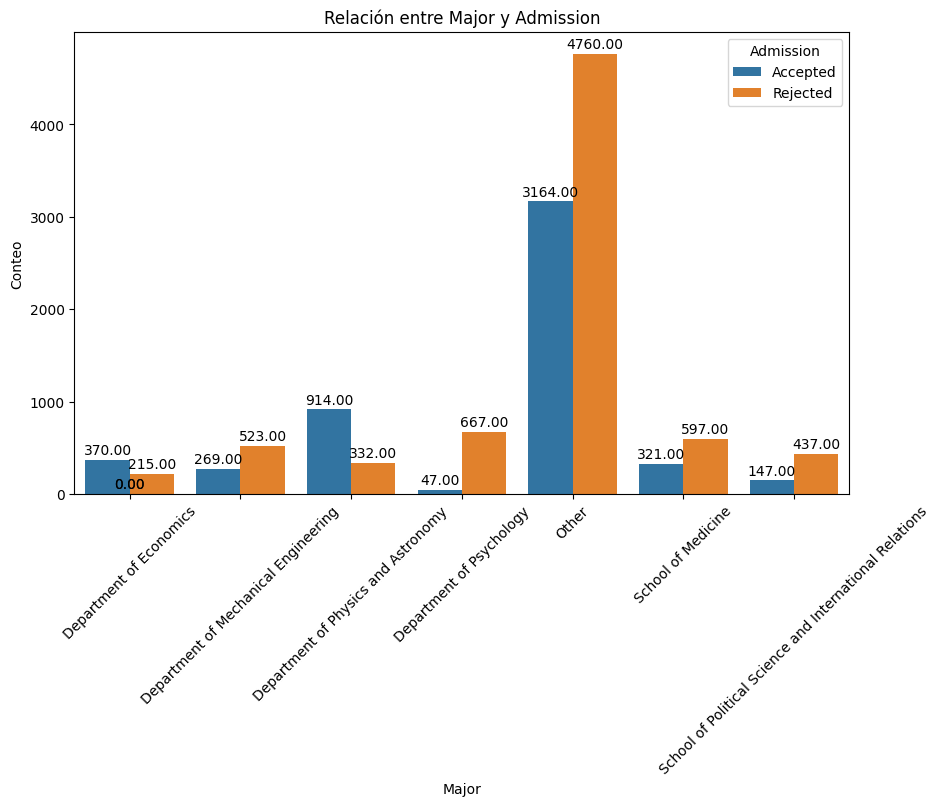

In [11]:
# Pintamos las admisiones por departamento que nos dara más informacion

plot_categorical_relationship_fin(df_admisiones,"Major","Admission", show_values=True, size_group=7)

* El departamento con mas rechazos es, despues de otros, el de psicologia y el que menos es el de econominas
* El departamento con mas aceptados es, despues de otros, el de ingenieria mecanica y el que menos el de psicologia.
* Aqui vemos que los departamentos de economicas y fisica&astronomia tienen mas casos de aceptados, contradiciendo asi, la idea principal

### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

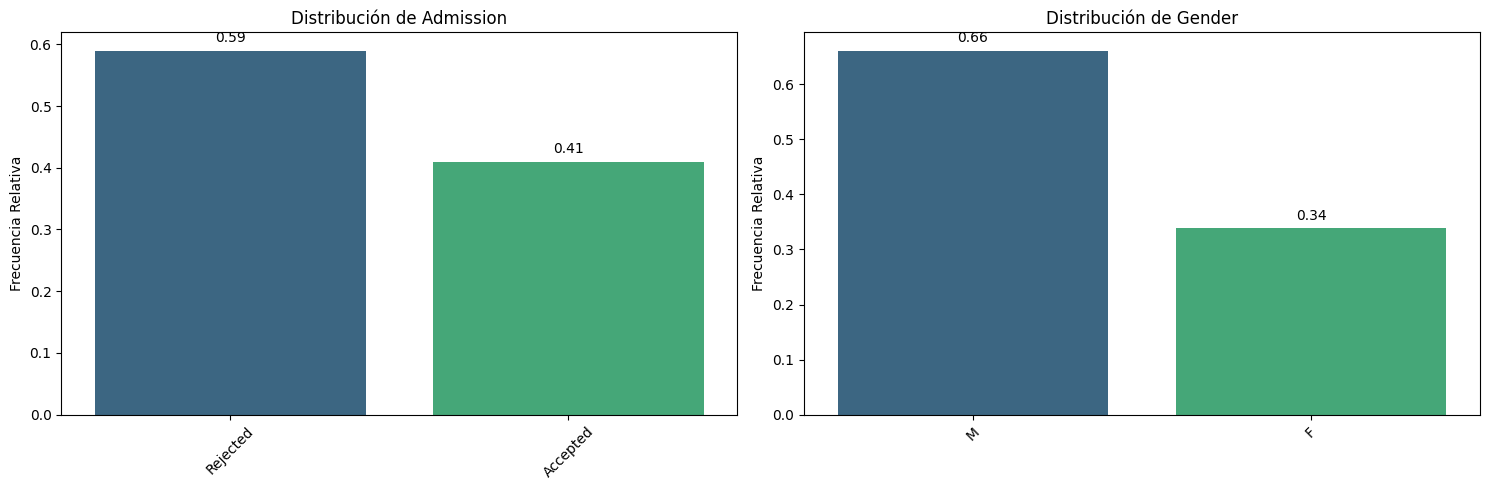

In [12]:
pinta_distribucion_categoricas(df_admisiones,["Admission","Gender"], relativa=True, mostrar_valores=True)

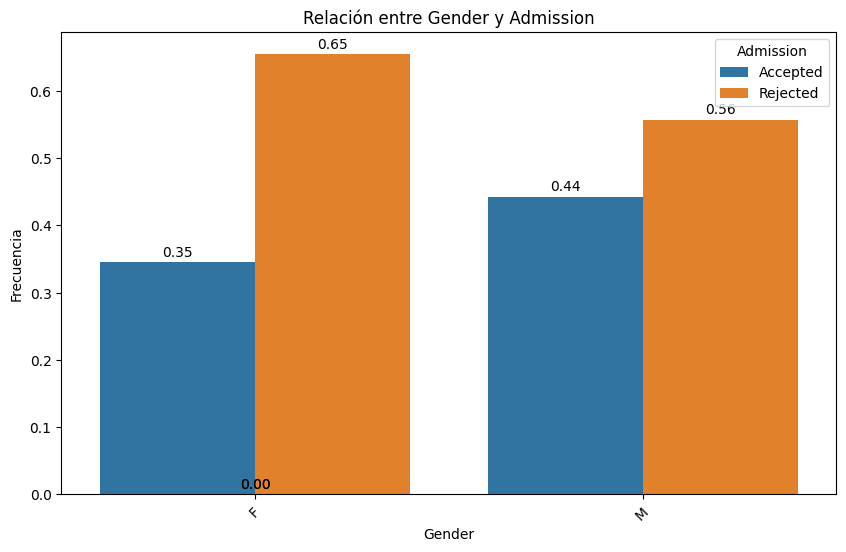

In [16]:
plot_categorical_relationship_fin(df_admisiones,"Gender","Admission", show_values=True, size_group=7, relative_freq=True)

* Se aprecia una mayor presencia masculina tanto en aceptados como en rechazados 71% y 62% respectivamente. (cambiando el orden de las graficas)
* Tambien se aprecia que hay mas hombres aceptados que mujeres, en proporcion, por tanto mas mujeres rechazadas

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [20]:
df_tips=pd.read_csv("./data/tips.csv")
df_tips.drop(columns="Unnamed: 0", inplace=True)

### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

In [23]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


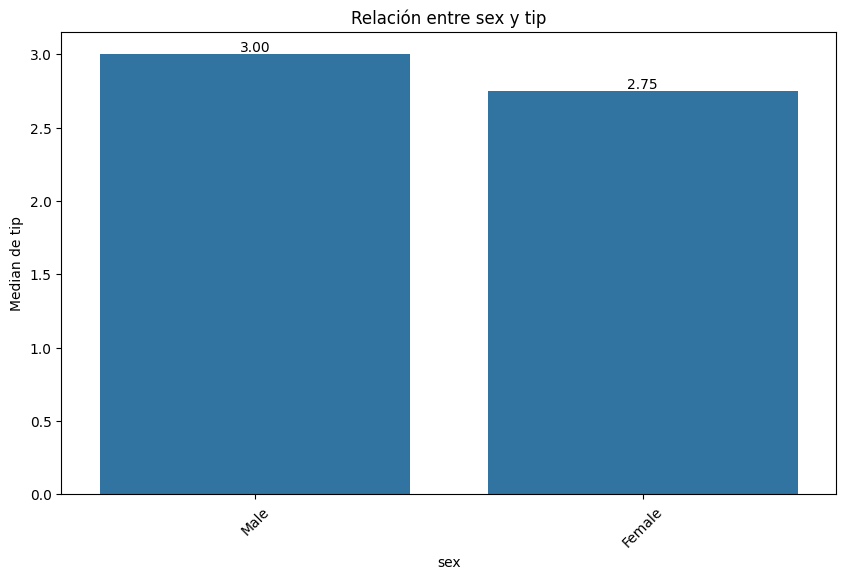

In [28]:
# Utilizo el grafico para relacionar categoricas y numericas, utilizo la mediana como medida
plot_categorical_numerical_relationship(df_tips,"sex","tip", show_values=True, measure="median")

* Se aprecia una ligera diferencia a favor del genero masculino, pero no es el grafico que mas informacion nos da.

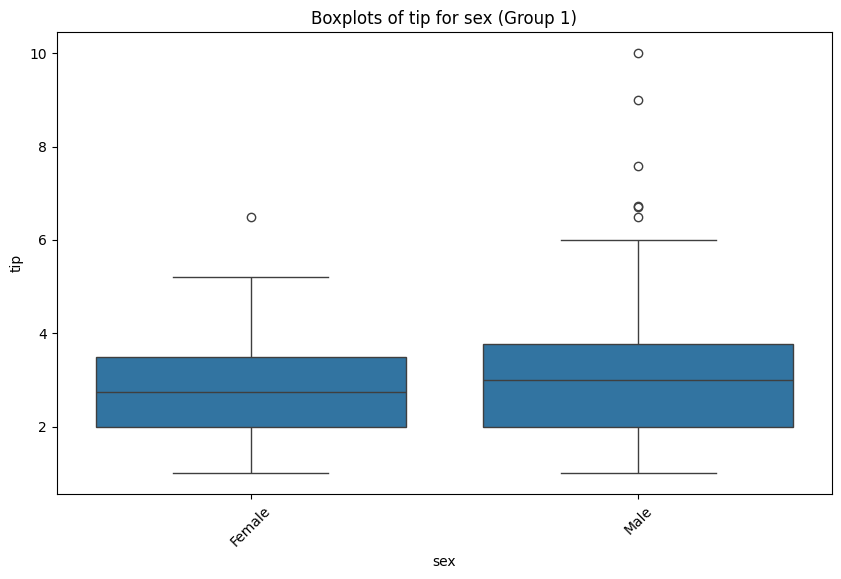

In [30]:
# Comparamos ahora viendo su grafico de cajas
plot_grouped_boxplots(df_tips,"sex","tip")

* Aquí apreciamos que la mediana, al igual que en el grafico anterior, esta por encima en el caso del genero masculino. Tambien lo apreciamos viendo sus Q3 y sus maximuns.
* Se observan outliers en ambos casos, siendo en el masculino el que tiene más valores por fuera de los bigotes.
* Se puede corroborar que dan mas propina los hombres que las mujeres en este caso.

### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

In [38]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
# Filtramos por fumadores para conocer sus datos
prop_fum=df_tips.loc[df_tips["smoker"]=="Yes","tip"].mean()
print(f"Media de propinas de fumadores: {round(prop_fum,2)}")
prop_nfum=df_tips.loc[df_tips["smoker"]=="No","tip"].mean()
print(f"Media de propinas de fumadores: {round(prop_nfum,2)}")


Media de propinas de fumadores: 3.01
Media de propinas de fumadores: 2.99


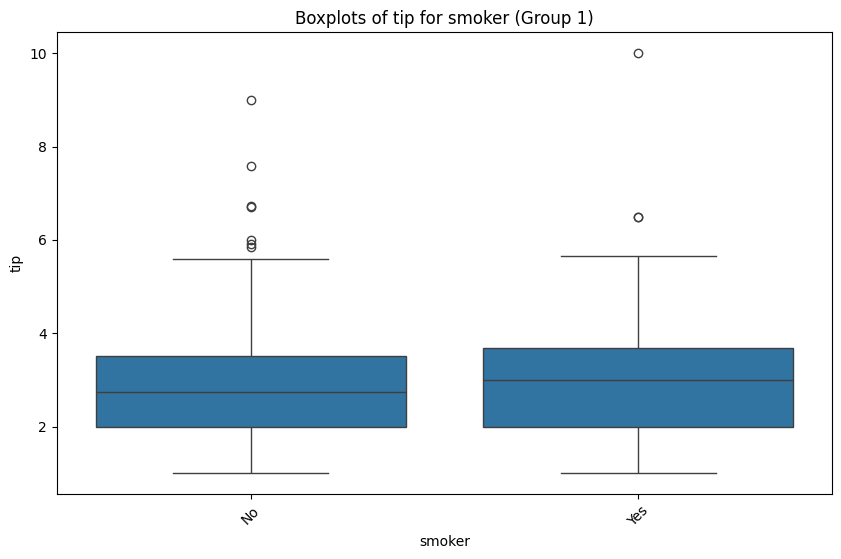

In [47]:
plot_grouped_boxplots(df_tips,"smoker","tip")

* De primeras los resultados nos indican que las propinas entre fumadores y no fumadores son practicamente la misma.
* El grafico nos muestra ligeramente lo mismo aunque sus valores de Q2 y Q3 son un poco mayores.
* Ambos presentan outliers pero los no fumadores tienen mas casos. Se podria decir que en general los que fuman pagan un poco mas, pero casi nada.

### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [52]:
df_cars=pd.read_csv("./data/car_crashes.csv", sep="|")
df_cars.drop(columns="Unnamed: 0")
df_cars.describe()

,Unnamed: 0,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.000000,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,14.866069,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,0.000000,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.500000,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,25.000000,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,37.500000,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,50.000000,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


### Ejercicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

(2, 2)


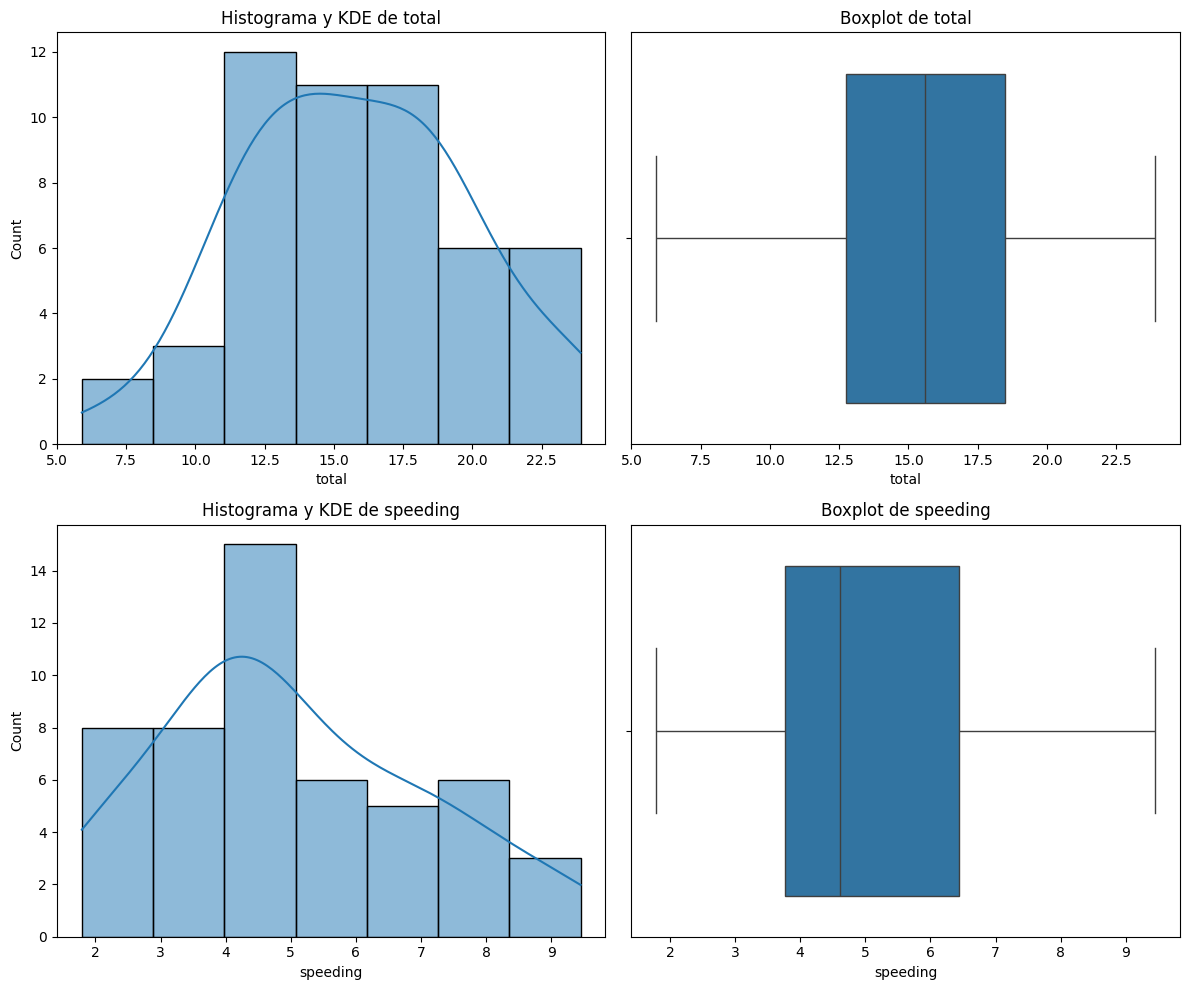

In [58]:
# Primero muestro los diagramas individuales

plot_combined_graphs(df_cars,["total","speeding"])

* Se puede apreciar una tendencia similiar, pero tampoco sabemos hasta que punto

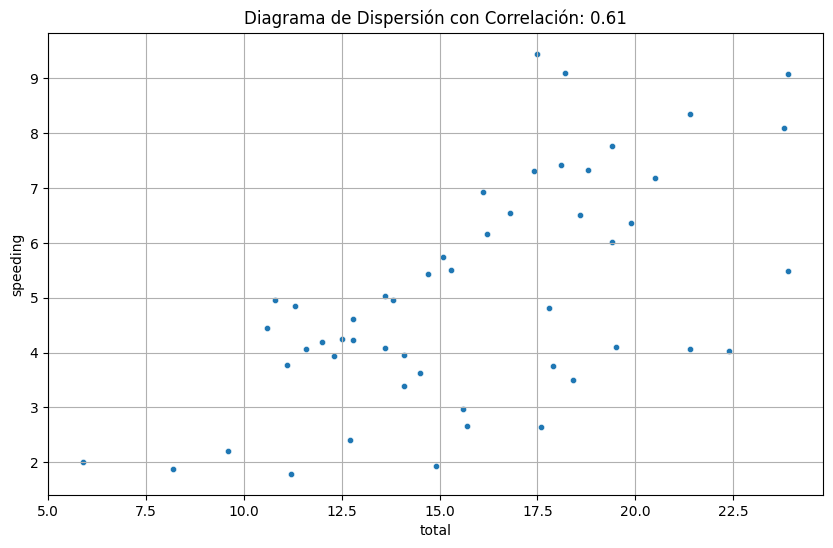

In [59]:
# Profundizamos con el grafico de dispersion

grafico_dispersion_con_correlacion(df_cars,"total","speeding", 20, mostrar_correlacion=True)

* Con la gráfica si que se observa algo más de correlacion pero no lo suficiente para decir que esos valores son fuertemente correlativos
* 

### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?

In [60]:
# Calculo de la correlacion y p-value
from scipy.stats import pearsonr

pearsonr(df_cars["total"], df_cars["speeding"])

PearsonRResult(statistic=0.6115476008001183, pvalue=1.867039110905684e-06)

Para el p-value (menor que 0.05) mostrado parece claro que podemos rechazar la hipótesis de inpendencia y decir que existe una relación lineal entre "total" y "speeding" estadísticamente significativa. A mayor numero de accidentes mayor es en general el número de accidentes en los que el factor velocidad tuvo que ver. De hecho esto invita a hacer una tasa de accidentes donde la velocidad tuvo que ver y comprobar como es su distribución, etc. 